# Face Mask Detection
    Face mask detection refers to the process of identifying whether a person in an image or video is wearing a face mask or not. This technology has gained significance, especially during the COVID-19 pandemic, as wearing masks in public places became a crucial measure to prevent the spread of the virus.

# Modules

In [1]:
import cv2
import matplotlib.pyplot as plt
import os
import numpy as np
import random

In [2]:
img_array = cv2.imread("Dataset/WithFaceMask/00000_Mask.jpg")

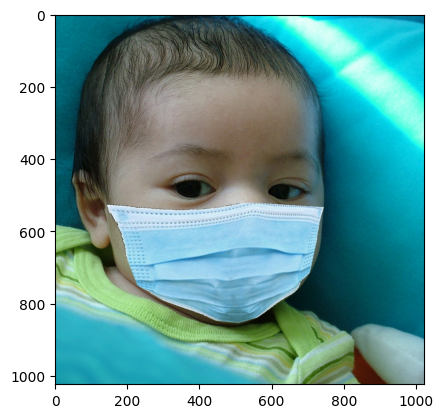

In [3]:
plt.imshow(cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB))

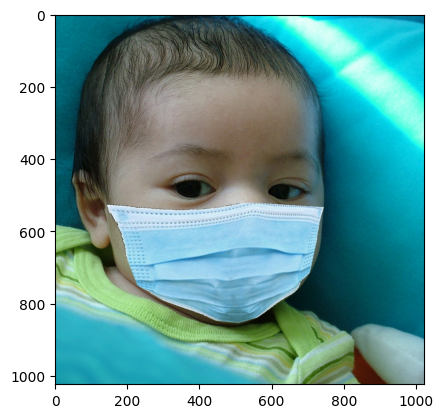

In [4]:
Datadirectory = "Dataset/"
Classes = ["WithFaceMask/","WithOutFaceMask"]
for category in Classes:
    Path = os.path.join(Datadirectory, category)  #Dataset/WithFaceMask/
    #print(Path)
    for img in os.listdir(Path):
        img_array = cv2.imread(os.path.join(Path, img)) #Dataset/WithFaceMask/0000_mask
        #print(img)
        plt.imshow(cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB))
        plt.show()
        break
    break

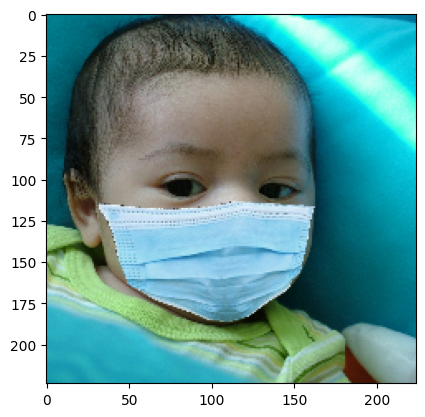

In [5]:
img_size = 224    # 244 x 244

new_img_array = cv2.resize(img_array, (img_size,img_size))
plt.imshow(cv2.cvtColor(new_img_array, cv2.COLOR_BGR2RGB))
plt.show()

In [6]:
Traning_data = []
Datadirectory = "Dataset/"
Classes = ["WithFaceMask/","WithOutFaceMask/"]
img_size = 224    # 244 x 244

def Create_Traning_Data():
    for category in Classes:
        Path = os.path.join(Datadirectory, category)  # Dataset/WithFaceMask/
        class_num = Classes.index(category)  # WithFaceMask-0 , WithOutFaceMask-1
        i = 0  #test
        for img in os.listdir(Path):
            try:
                img_array = cv2.imread(os.path.join(Path, img))
                new_img_array = cv2.resize(img_array, (img_size, img_size))
                Traning_data.append([new_img_array,class_num])
                i += 1
            except Exception as e:
                pass
            if(i == 20):   #test
                break
            

In [7]:
Create_Traning_Data()

In [8]:
len(Traning_data)

40

In [9]:
# for i in range(0,len(Traning_data)):
#     print(Traning_data[i][1])

In [10]:

random.shuffle(Traning_data)

In [11]:
# for i in range(0,len(Traning_data)):
#     print(Traning_data[i][1])

In [12]:
X = []  # X stores the image
Y = []  # Y stores the classes(0,1)

# for i,j in Traning_data:
#     print("i = ",i,"\n","j = ",j,end="\n\n")


In [13]:
l = [[1,2],[3,4],[6,8],[5,6],[10,12]]
for i,j in l:
    print(i,j)

1 2
3 4
6 8
5 6
10 12


In [14]:
X = []  # X stores the image
Y = []  # Y stores the classes(0,1)

for i,j in Traning_data:
    X.append(i)
    Y.append(j)

In [15]:
len(X)

40

In [16]:
len(X[0])

224

In [17]:
len(X[0][0])

224

In [18]:
len(X[0][0][0])

3

In [19]:
# print(X[0])

In [20]:
X = np.array(X)

In [21]:
X.shape

(40, 224, 224, 3)

In [22]:
X = X.reshape(-1,img_size,img_size,3)

In [23]:
X.shape

(40, 224, 224, 3)

# Normalizing
    Scaling: Pixel values in images typically range from 0 to 255 for each channel (8-bit per channel). Normalizing these values to the range [0, 1] scales them down, making computations more numerically stable. It ensures that the values are within a reasonable range, which can help prevent issues like exploding gradients during training.
    
Consistency: Normalizing pixel values to the same scale (e.g., [0, 1]) makes it easier to compare images and ensures consistency across different datasets. This can be particularly important when you're training machine learning models on multiple datasets or when images have different dynamic ranges.    

Regularization: Normalization can act as a form of regularization, helping to prevent overfitting by constraining the input values to a specific range. It can also improve the convergence of optimization algorithms during trainin    g.

Compatibility: Many machine learning libraries and frameworks expect input data to be in a certain range, often [0, 1] or [-1, 1]. Normalizing the pixel values ensures compatibility with these libraries and framew    o    rks.

Overall, normalizing the BGR values to the range [0, 1] is a good practice that can help improve the performance and stability of your image processing or machine learning pipelines.

In [24]:
X = X/255.0  # normalizing

In [25]:
# X[0]

In [26]:
Y = np.array(Y)

In [27]:
Y.shape

(40,)

# pickling
<p>1. Converts a Python object (list, dictionary, etc.) into a byte stream.</p>
<p>2. This stream contains all information to reconstruct the object later.</p>
<p>3. Use pickle.dump() to serialize (pickle) an object to a file</p>
<h1>unpickling</h1>
<p>1. Reverses the pickling process.</p>
<p>2. 
Converts the byte stream back into the original Python object.</p
<p>3. Use pickle.load() to deserialize (unpickle) an object from a file.</p>>.Python programs.

In [28]:
import pickle

In [29]:
pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("Y.pickle","wb")
pickle.dump(Y, pickle_out)
pickle_out.close()

In [30]:
pickle_out

<_io.BufferedWriter name='Y.pickle'>

In [31]:
Pickle_in = open("X.pickle","rb")
X = pickle.load(Pickle_in)

Pickle_in = open("Y.pickle","rb")
Y = pickle.load(Pickle_in)

In [32]:
# X

In [33]:
Y

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1])

# Deap Learning Model for Traning

In [34]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers 

In [35]:
model = tf.keras.applications.mobilenet.MobileNet()

# Mobile Net
<p>
MobileNet is a family of convolutional neural network architectures designed for efficient mobile and embedded vision applications. It was introduced by Google researchers in a paper titled "MobileNets: Efficient Convolutional Neural Networks for Mobile Vision Applications</p>
<p>

The key idea behind MobileNet is to provide lightweight and efficient neural network architectures that can perform image classification, object detection, and other computer vision tasks on devices with limited computational resources, such as smartphones, tablets, and embedded systems.</p>

In [36]:
# model.summary()

In [37]:
model.layers[0].input

<KerasTensor: shape=(None, 224, 224, 3) dtype=float32 (created by layer 'input_1')>

In [38]:
model.layers[-4].output

<KerasTensor: shape=(None, 1, 1, 1024) dtype=float32 (created by layer 'dropout')>

In [39]:
base_input = model.layers[0].input

In [40]:
base_output = model.layers[-4].output